Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [39]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    Best = -float("inf")  #choosing - inf to consider any assistant to be better than the current one
    count=0
    for i in applicants:
        if i > Best:
            Best = i 
            count+=1
    return count
    # YOUR CODE HERE
    raise NotImplementedError()

print(hire_assistant([1])==1)
print(hire_assistant([-1, -2, 5, -4])==2)

True
True


In [2]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [128]:
import random
def experimental_hires(N):
    count=0
    for i in range(20):
        sample=[]
        for i in range(N): 
            sample.append(random.randint(1, 20)) #generating random values from 1 to 20. I am assuming that this is the range of skills that each assistant can have. 1 for the worst and 20 to be the best
        count = count + hire_assistant(sample)
    return (count/20)
    # YOUR CODE HERE
    raise NotImplementedError()

In [129]:
experimental_hires(10)

2.2

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [59]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

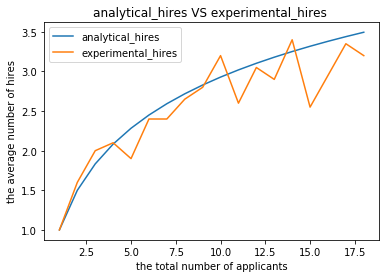

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(1,19)]

analytical_storage=[]
experimental_storage=[]

for i in x:
    analytical_storage.append(analytical_hires(i))
    experimental_storage.append(experimental_hires(i))
    
fig, ax = plt.subplots()

ax.plot(x,analytical_storage, label="analytical_hires")
ax.plot(x,experimental_storage, label="experimental_hires")

ax.set_xlabel('the total number of applicants')
ax.set_ylabel('the average number of hires')
ax.set_title('analytical_hires VS experimental_hires ')

leg = ax.legend();
#raise NotImplementedError()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

Text(0.5, 1.0, 'probability that exactly one assistant is hired in N applicants')

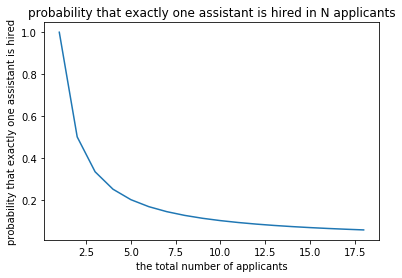

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(1,19)]
y=  [1/i for i in range(1,19)]


fig, ax = plt.subplots()

ax.plot(x,y)
ax.set_xlabel('the total number of applicants')
ax.set_ylabel('probability that exactly one assistant is hired')
ax.set_title('probability that exactly one assistant is hired in N applicants')

#raise NotImplementedError()

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (ie. at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party goers. 
What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

I think we still need to generate a random sample similar to the one in the assistant problem. Generally, we call an algorithm randomized if its behavior is determined not only by its input but also by values produced by a random-number generator. Knowing that every person has a unique value is not enough to detrmine that everyone is coming to the party in a randomized matter, which will be optianed by a random-number generator. 

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Based on my test below, I will choose Command 2 as it fulfills the simulation requiremnets in choosing a unique random value for each participant. Command 2 will provice unique integers from 0 to 100. 

In [149]:
import numpy as np
print (np.random.sample(10))

hat_list = list(range(100)) 
np.random.shuffle(hat_list)
print (hat_list)

hat_list1 = [np.random.integers(0,100) for i in range(100)]
print(hat_list12)


[0.1023135  0.19599802 0.94776378 0.08565108 0.62285802 0.37048754
 0.65497504 0.44322594 0.22377196 0.66310832]
[45, 34, 57, 7, 28, 56, 23, 1, 39, 81, 59, 69, 67, 18, 75, 84, 0, 29, 49, 40, 13, 5, 26, 76, 68, 42, 17, 73, 54, 60, 4, 50, 38, 25, 63, 65, 43, 88, 80, 74, 55, 66, 12, 16, 19, 83, 33, 46, 37, 82, 14, 32, 44, 91, 31, 87, 3, 2, 41, 85, 98, 20, 8, 52, 95, 6, 90, 27, 62, 99, 15, 24, 58, 70, 92, 10, 61, 53, 11, 86, 93, 47, 51, 89, 9, 21, 48, 30, 78, 96, 72, 36, 22, 64, 79, 94, 71, 35, 77, 97]


AttributeError: module 'numpy.random' has no attribute 'integers'

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [183]:
""""My algorithm to solve this question is that I am assuming that attendants are coming in a random way and the returned 
hats are also in a random way. I will build two lists to save these assumptions, then I will compare both of them to check
of the correctly returned hats. This condition will be achieved if we have the similar integer at the same index in both
lists"""
def hat_check(N):
    count = 0
    
    orginalhatlist = list(range(N)) 
    np.random.shuffle(orginalhatlist)
    returnedlist = list(range(N)) 
    np.random.shuffle(returnedlist)
    for i in range(N):
        if orginalhatlist[i] == returnedlist[i]:
            count += 1
    return count
#raise NotImplementedError()

In [211]:
def avghat_check(N):  
    #This function for averaging the results of hat_check. I built this external function just to make sure I am taking the avg in the right way :"D"
    count =0
    for i in range(20):
        count = count +hat_check(N)
    return count/20
        
avghat_check(1000)   

1.15

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

Text(0, 0.5, 'the average number of hats correctly returned')

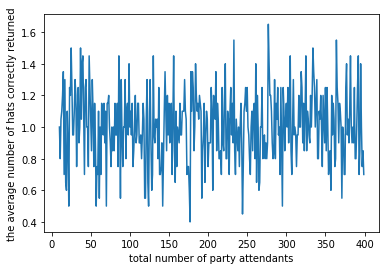

In [216]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(10,400)]
y=  [avghat_check(i) for i in range(10,400)]


fig, ax = plt.subplots()

ax.plot(x,y)
ax.set_xlabel('total number of party attendants')
ax.set_ylabel('the average number of hats correctly returned')
#raise NotImplementedError()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE